# Find whether any country stands out based on their average eating habits using AutoEncoder

<b>Import required libraries<b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>Load data<b>

In [2]:
df = pd.read_csv('UK_foods.csv', index_col='Unnamed: 0') #Set index_col to the required column to avoid error while plotting

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Cheese to Confectionery 
Data columns (total 4 columns):
England      17 non-null int64
Wales        17 non-null int64
Scotland     17 non-null int64
N.Ireland    17 non-null int64
dtypes: int64(4)
memory usage: 680.0+ bytes


In [4]:
df.columns

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [5]:
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [6]:
df.describe()

,England,Wales,Scotland,N.Ireland
count,17.000000,17.000000,17.000000,17.000000
mean,469.647059,503.941176,460.235294,429.941176
std,452.701466,463.859282,469.595907,479.896014
min,54.000000,64.000000,53.000000,41.000000
25%,156.000000,175.000000,147.000000,135.000000
50%,253.000000,265.000000,242.000000,209.000000
75%,685.000000,803.000000,566.000000,586.000000
max,1472.000000,1582.000000,1572.000000,1506.000000


<b>Transpose the DataFrame<b>

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
type(df['England'])

pandas.core.series.Series

In [9]:
t_df = df.transpose()

In [10]:
t_df.columns

Index(['Cheese', 'Carcass_meat ', 'Other_meat ', 'Fish', 'Fats_and_oils ',
       'Sugars', 'Fresh_potatoes ', 'Fresh_Veg ', 'Other_Veg ',
       'Processed_potatoes ', 'Processed_Veg ', 'Fresh_fruit ', 'Cereals ',
       'Beverages', 'Soft_drinks ', 'Alcoholic_drinks ', 'Confectionery '],
      dtype='object')

In [11]:
t_df

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [12]:
#t_df = t_df.astype('category')

<b>Visulaize data using Heatmap<b>

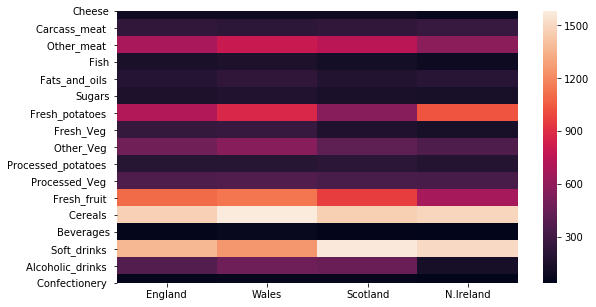

In [13]:
plt.figure(figsize=(9,5))
sns.heatmap(df)

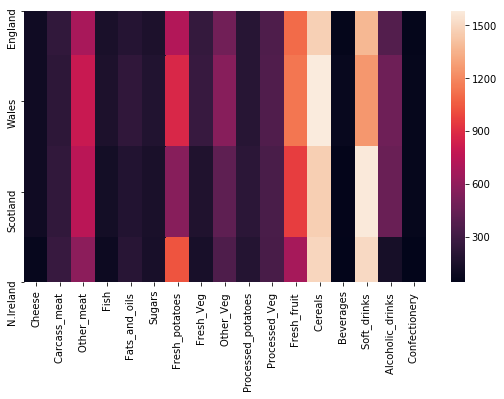

In [14]:
plt.figure(figsize=(9,5))
sns.heatmap(t_df)

<b>Import required libraries to create the AutoEncoder<b>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

<b>Create an Encoder with the layers as -> 17-8-4-2<b>

In [78]:
encoder = Sequential()

encoder.add(Dense(8, activation='tanh',input_shape=[17]))
encoder.add(Dense(4, activation='tanh',input_shape=[8]))
encoder.add(Dense(2, activation='tanh',input_shape=[4])) 
#Input_shape can be excluded after first entry

<b>Create a Decoder with the layers as -> 2-4-8-17<b>

In [79]:
decoder = Sequential()

decoder.add(Dense(units=4, activation='tanh', input_shape=[2]))
decoder.add(Dense(units=8, activation='tanh', input_shape=[4]))
decoder.add(Dense(units=17, activation='tanh', input_shape=[8]))

<b>Combine Encoder & Decoder to form the AutoEncoder<b>

In [80]:
autoencoder = Sequential([encoder,decoder])

autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))
#Instead of adam optimizer, we are using Stochastic Gradient Descent with a learning rate of 1.5
#Since values are continuous, loss is mse

<b>Scale the Dataset<b>

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()

In [83]:
scaled_df = scaler.fit_transform(df.transpose().values) #.values is used to ensure we get numpy array properly

In [84]:
#Shape should be (4,17)
scaled_df.shape

(4, 17)

In [85]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

<b>Fit AutoEncoder to scaled data<b>

In [86]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 0s 98ms/sample - loss: 0.4559
Epoch 2/15
4/4 [==============================] - 0s 4ms/sample - loss: 0.2987
Epoch 3/15
4/4 [==============================] - 0s 1000us/sample - loss: 0.2107
Epoch 4/15
4/4 [==============================] - 0s 999us/sample - loss: 0.1746
Epoch 5/15
4/4 [==============================] - 0s 2ms/sample - loss: 0.1599
Epoch 6/15
4/4 [==============================] - 0s 749us/sample - loss: 0.1531
Epoch 7/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.1491
Epoch 8/15
4/4 [==============================] - 0s 753us/sample - loss: 0.1461
Epoch 9/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.1432
Epoch 10/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.1401
Epoch 11/15
4/4 [==============================] - 0s 746us/sample - loss: 0.1365
Epoch 12/15
4/4 [==============================] - 0s 755us/sample - loss: 0.1322
Epoch 13/15
4/4 

<b>Predict reduced dimensionality output from Encoder<b>

In [87]:
encoded_2_dim = encoder.predict(scaled_df)

In [88]:
encoded_2_dim

array([[ 0.32416028,  0.83987844],
       [ 0.5911264 ,  0.84721285],
       [-0.3215528 ,  0.8651822 ],
       [-0.72358733,  0.902552  ]], dtype=float32)

In [89]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [90]:
t_df.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

<b>Join the encoded data with country index<b>

In [91]:
results = pd.DataFrame(data=encoded_2_dim,index=t_df.index,columns=['C1','C2'])

In [92]:
results

,C1,C2
England,0.324160,0.839878
Wales,0.591126,0.847213
Scotland,-0.321553,0.865182
N.Ireland,-0.723587,0.902552


In [93]:
results.reset_index()

,index,C1,C2
0,England,0.324160,0.839878
1,Wales,0.591126,0.847213
2,Scotland,-0.321553,0.865182
3,N.Ireland,-0.723587,0.902552


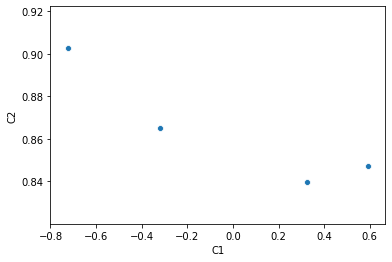

In [100]:
sns.scatterplot(x='C1',y='C2',data=results)

<b>Note: If the Encoder gives all values as 0 at output, change the activaton function. In above case, I have changed it to 'tanh' instead of 'relu', as 'relu' was returning all values as 0. You can try LeakyReLU as well<b>